# SHINE BRIGHT LIKE A DIAMOND

In [1]:
! pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (0.11.1)


## ETL

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='diamonds.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond = df_data_1.copy()

In [4]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

#### Installing packages

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

### Data Visualization

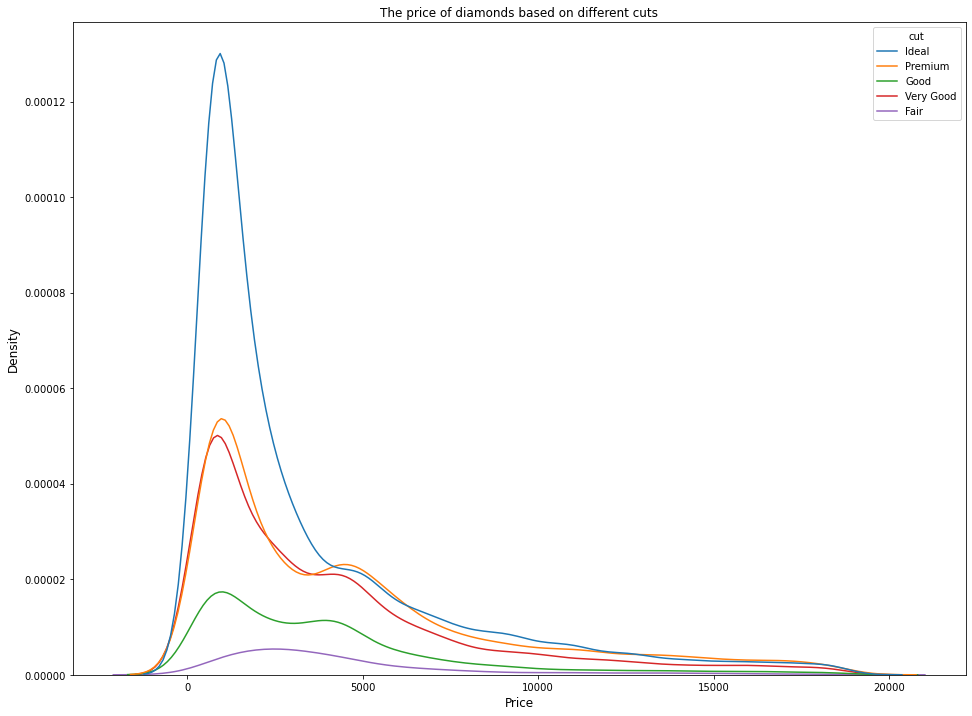

In [7]:
plt.figure(figsize = (16,12))
sns.kdeplot(x = "price", data = diamond,hue = "cut")
plt.xlabel("Price", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.title("The price of diamonds based on different cuts")
plt.show();

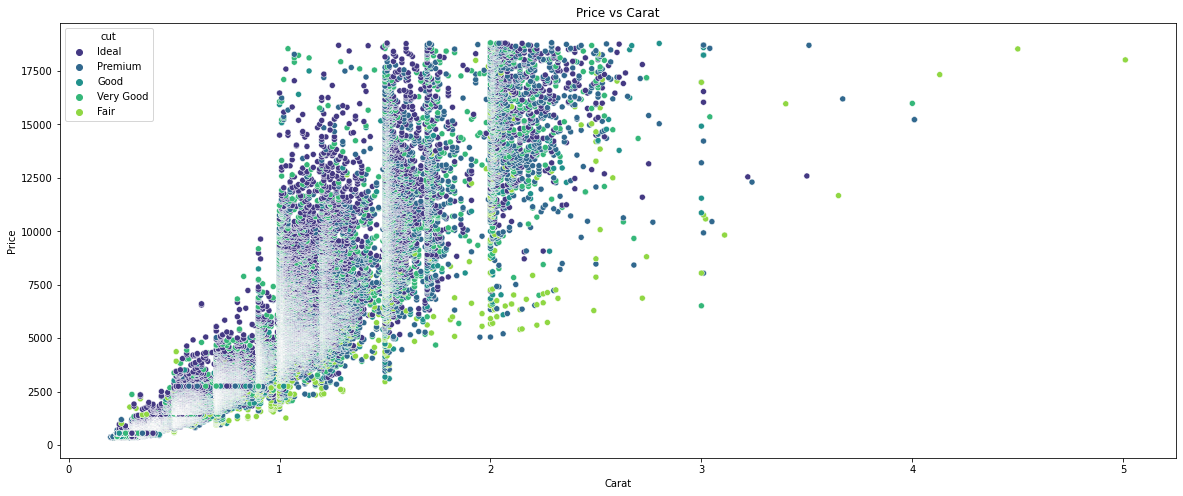

In [8]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = "carat", y = "price", data = diamond, hue = "cut", palette = "viridis")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Price vs Carat")
plt.show();

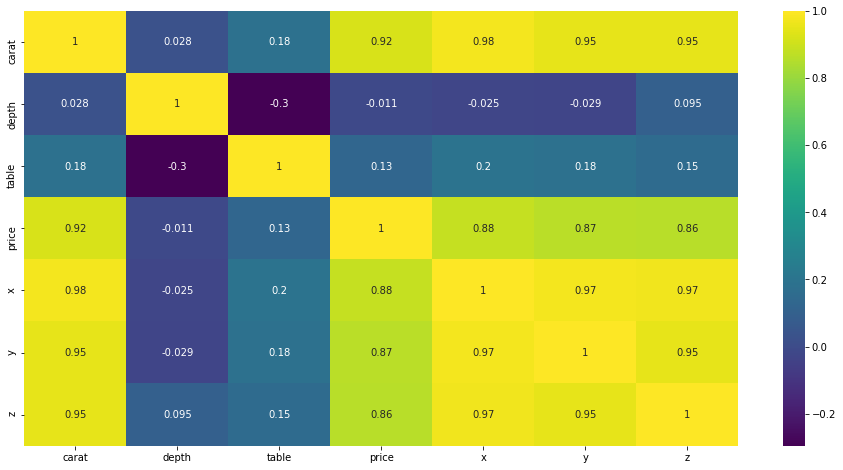

In [9]:
plt.figure(figsize = (16,8))
cor = diamond.corr()
sns.heatmap(cor, annot = True, cmap = "viridis")

### Building predictive model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import KernelPCA

In [11]:
diamond["cut"] = diamond["cut"].replace(["Fair", "Good", "Very Good", "Premium", "Ideal"], [0,1,2,3,4])

In [12]:
diamond["cut"] = diamond["cut"].astype(int)

In [13]:
onehot = OneHotEncoder()
std = StandardScaler()

In [14]:
column_pipeline = ColumnTransformer([("onehot", onehot, ["color", "clarity"]), ("std", std, ["carat","x", "y", "z"])])

In [15]:
X = diamond.drop(["price", "depth", "table"], axis = 1)

In [16]:
y = diamond["price"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42069)

In [18]:
rfe = RFECV(Lasso(alpha = 0.3), cv = 3)
poly = PolynomialFeatures()
forest = RandomForestRegressor()

In [19]:
full_pipeline = Pipeline([("col", column_pipeline),("reg", forest)])

In [20]:
param_grid = [{"reg__n_estimators" : np.arange(1,50), "reg__max_features":np.arange(1,6)}]
grid_search = GridSearchCV(full_pipeline, param_grid, cv = 5)

In [21]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['color',
                                                                          'clarity']),
                                                                        ('std',
                                                                         StandardScaler(),
                                                                         ['carat',
                                                                          'x',
                                                                          'y',
                                                                          'z'])])),
                                       ('reg', RandomForestRegressor())]),
             param_g

In [22]:
model = grid_search.best_estimator_

In [23]:
grid_search.best_estimator_

Pipeline(steps=[('col',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['color', 'clarity']),
                                                 ('std', StandardScaler(),
                                                  ['carat', 'x', 'y', 'z'])])),
                ('reg',
                 RandomForestRegressor(max_features=5, n_estimators=43))])

In [24]:
model.fit(x_train, y_train)

Pipeline(steps=[('col',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['color', 'clarity']),
                                                 ('std', StandardScaler(),
                                                  ['carat', 'x', 'y', 'z'])])),
                ('reg',
                 RandomForestRegressor(max_features=5, n_estimators=43))])

In [25]:
y_train_pred = cross_val_predict(model, x_train, y_train, cv = 5)

In [26]:
new_train = x_train.copy()
new_train['price'] = y_train
new_train['predicted price'] = y_train_pred

In [27]:
new_train.head()

,carat,cut,color,clarity,x,y,z,price,predicted price
53744,0.74,4,D,SI1,5.82,5.78,3.61,2723,2844.596899
17597,1.21,4,I,VVS1,6.88,6.80,4.21,7086,7402.093023
21600,1.52,4,H,SI1,7.43,7.32,4.56,9700,9430.674419
43225,0.40,4,E,VVS1,4.74,4.70,2.91,1397,1363.023256
34427,0.30,4,G,IF,4.30,4.33,2.65,863,860.465116


In [28]:
y_pred = model.predict(x_test)

In [29]:
r2_score(y_test, y_pred)

0.9811789639608004

In [30]:
import math
mse = math.sqrt(mean_squared_error(y_test, y_pred))
mse

552.1934318293514

In [31]:
cross_val_score(model, x_train, y_train, cv = 5)

array([0.97872895, 0.97993404, 0.97722189, 0.97849972, 0.9784791 ])

In [32]:
new_test = x_test.copy()
new_test["price"] = y_test
new_test["predicted price"] = y_pred
new_test.head()

,carat,cut,color,clarity,x,y,z,price,predicted price
2246,1.02,4,I,VS2,6.45,6.39,4.03,3148,4566.488372
9192,0.90,1,G,VS2,6.23,6.32,3.79,4547,4399.860465
37903,0.41,3,F,VS1,4.74,4.77,2.98,1007,1000.534884
4336,0.90,4,E,SI2,6.23,6.15,3.84,3599,3573.790698
6115,0.73,4,D,VS2,5.79,5.82,3.57,3980,3475.534884
